<a href="https://colab.research.google.com/github/Rogerio-mack/Inteligencia_Artificial/blob/main/qlearnCorrectv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import json
import gym
from gym import spaces
import pandas as pd
import numpy as np

class handMove(gym.Env):
    """Function Approximation environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, what=0):
        super(handMove, self).__init__()

        # Added ----------------------------------------------------------------
        self.what = what
        self.actions = ['Go right','Go left','Go up','Go down']  
        self.observations = ['It is right','It is left','It is up','It is down']  
        
        self.goal = {}
        for i in range(len(self.observations)):
          self.goal[self.observations[i]] = self.actions[i]
        self.reward_values = {'right action': 1, 
                              'wrong action': -1}
        # Added ----------------------------------------------------------------

        self.reward_range = (-1, 1)
        self.action_space = spaces.Discrete(len(self.actions))
        self.observation_space = spaces.Discrete(len(self.observations))

    def _next_observation(self):
        return random.randint(0,len(self.observations)-1)

    def _take_action(self, action):
        return action

    def step(self, action):
    
        self._take_action(action)

        if self.goal[self.decode_actions_observations(self.what,action=False)] ==  self.decode_actions_observations(action):
          reward = self.reward_values['right action']
        else:
          reward = self.reward_values['wrong action']
        
        observation = self.what
        self.what = self._next_observation()

        done = False               # gym, must be a boolean!
        p = 1.0 

        return observation, reward, done, {"prob": p}

    def reset(self):
        self.what = random.randint(0,len(self.observations)-1)
        return self.what

    def render(self, mode='human', close=False):
        print('what: \t\t\t:', self.what)
        print('goal: \t\t\t:', self.goal)
        print('reward: \t\t:', self.reward_values)
        return  

    # Added ----------------------------------------------------------------
    def encode_actions_observations(self,action_observation,action=True):
        if action:
          return self.actions.index(action_observation)
        else: # it's a observation
          return self.observations.index(action_observation)
        return 

    def decode_actions_observations(self,action_observation_placehold,action=True):
        if action:
          return self.actions[action_observation_placehold]
        else: # it's a observation
          return self.observations[action_observation_placehold]
        return       
    # Added ----------------------------------------------------------------

In [ ]:
env = handMove(0)

In [ ]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_next_observation',
 '_take_action',
 'action_space',
 'actions',
 'close',
 'decode_actions_observations',
 'encode_actions_observations',
 'goal',
 'metadata',
 'observation_space',
 'observations',
 'render',
 'reset',
 'reward_range',
 'reward_values',
 'seed',
 'spec',
 'step',
 'unwrapped',
 'what']

In [ ]:
env.what

0

In [ ]:
env.decode_actions_observations(env.what,action=False)

'It is right'

In [ ]:
env.actions

['Go right', 'Go left', 'Go up', 'Go down']

In [ ]:
env.observations

['It is right', 'It is left', 'It is up', 'It is down']

In [ ]:
env.action_space.sample()

2

In [ ]:
env.observation_space.sample()

2

In [ ]:
for i in range(10):
  print(env.decode_actions_observations(env.action_space.sample())) 

Go down
Go right
Go left
Go left
Go left
Go down
Go left
Go up
Go up
Go up


In [ ]:
for i in range(10):
  print(env.decode_actions_observations(env.observation_space.sample(),action=False)) 

It is left
It is up
It is right
It is right
It is left
It is left
It is right
It is right
It is right
It is up


In [ ]:
env._next_observation()

3

In [ ]:
for i in range(20):
  action = env.action_space.sample()
  print(env.what, action, env.step(action))
  print(env.decode_actions_observations(env.what,action=False), env.decode_actions_observations(action), env.step(action))
  # env.what = env._next_observation()

0 3 (0, -1, False, {'prob': 1.0})
It is up Go down (2, -1, False, {'prob': 1.0})
0 3 (0, -1, False, {'prob': 1.0})
It is right Go down (0, -1, False, {'prob': 1.0})
2 3 (2, -1, False, {'prob': 1.0})
It is right Go down (0, -1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
It is right Go right (0, 1, False, {'prob': 1.0})
2 1 (2, -1, False, {'prob': 1.0})
It is left Go left (1, 1, False, {'prob': 1.0})
1 2 (1, -1, False, {'prob': 1.0})
It is up Go up (2, 1, False, {'prob': 1.0})
1 0 (1, -1, False, {'prob': 1.0})
It is down Go right (3, -1, False, {'prob': 1.0})
2 0 (2, -1, False, {'prob': 1.0})
It is up Go right (2, -1, False, {'prob': 1.0})
2 3 (2, -1, False, {'prob': 1.0})
It is up Go down (2, -1, False, {'prob': 1.0})
0 2 (0, -1, False, {'prob': 1.0})
It is up Go up (2, 1, False, {'prob': 1.0})
0 2 (0, -1, False, {'prob': 1.0})
It is left Go up (1, -1, False, {'prob': 1.0})
2 1 (2, -1, False, {'prob': 1.0})
It is down Go left (3, -1, False, {'prob': 1.0})
0 3 (0, -1, False, 

In [ ]:
env.reset()

2

In [ ]:
env.render()

what: 			: 2
goal: 			: {'It is right': 'Go right', 'It is left': 'Go left', 'It is up': 'Go up', 'It is down': 'Go down'}
reward: 		: {'right action': 1, 'wrong action': -1}


In [ ]:
def q_table_df(q_table,env):
  import pandas as pd
  q_table_df = pd.DataFrame(q_table, columns=env.actions)
  q_table_df.index = env.observations

  return q_table_df
  
def q_table_build(env):
  q_table = np.zeros([len(env.observations), len(env.actions)])

  return q_table

q_table = q_table_build(env)

display( q_table_df(q_table,env) )

,Go right,Go left,Go up,Go down
It is right,0.0,0.0,0.0,0.0
It is left,0.0,0.0,0.0,0.0
It is up,0.0,0.0,0.0,0.0
It is down,0.0,0.0,0.0,0.0


In [ ]:
def policy_epsilon_greedy(env, q_table, epsilon):
  import random

  if random.random() < epsilon:
    action_idx = env.action_space.sample() # Explore action space
  else:
    action_idx = np.argmax(q_table[env.what,:]) # Exploit learned values

  return action_idx

q_table = np.identity(q_table.shape[0])
print(q_table)

for i in range(20):
  action = policy_epsilon_greedy(env, q_table, 0)    # 0 error
  # action = policy_epsilon_greedy(env, q_table, 0)  # maybe error
  print(env.what, action, env.step(action))
  env.what = env._next_observation()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
2 2 (2, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
3 3 (3, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
2 2 (2, 1, False, {'prob': 1.0})
1 1 (1, 1, False, {'prob': 1.0})
2 2 (2, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
1 1 (1, 1, False, {'prob': 1.0})
3 3 (3, 1, False, {'prob': 1.0})
1 1 (1, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
2 2 (2, 1, False, {'prob': 1.0})
1 1 (1, 1, False, {'prob': 1.0})
0 0 (0, 1, False, {'prob': 1.0})
2 2 (2, 1, False, {'prob': 1.0})
2 2 (2, 1, False, {'prob': 1.0})
3 3 (3, 1, False, {'prob': 1.0})


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Training finished.



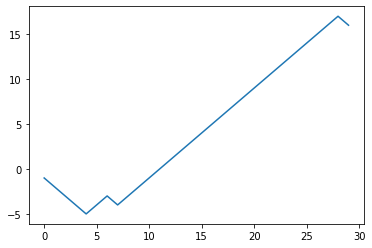

array([[ 0.598502  ,  0.        ,  0.        ,  0.        ],
       [-0.1       ,  0.499001  ,  0.        ,  0.        ],
       [-0.12090755, -0.1       ,  0.6979035 ,  0.        ],
       [-0.1       , -0.1       , -0.1       ,  0.499001  ]])

In [ ]:
# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1

q_table = np.zeros([q_table.shape[0],q_table.shape[1]])
print(q_table)

reward_hist = []

env.reset()

for epochs in range(30):

    action = policy_epsilon_greedy(env, q_table, epsilon)
    observation, reward, done, info = env.step(action) 
    reward_hist.append(reward)

    # print(state, action, next_state, reward) 

    old_value = q_table[observation, action]
    next_max = np.max(q_table[observation, :]) 
    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    q_table[observation, action] = new_value

    # env.what = env._next_observation()

    # print(q_table)

print("Training finished.\n")

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.array(reward_hist).cumsum())
plt.show()

q_table  

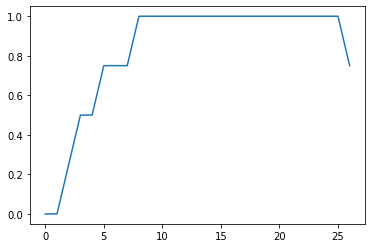

4

In [ ]:
def plot_learning(reward_hist, window_size=int(len(reward_hist)/5)):
  import matplotlib.pyplot as plt
  %matplotlib inline

  learning_hist = []

  for i in range(len(reward_hist) - window_size + 1):
    learning_hist.append( reward_hist[i:i+window_size].count(1) / (window_size) )

  plt.plot(np.array(learning_hist))
  plt.show()

  return window_size

plot_learning(reward_hist,4)

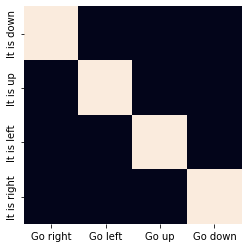

In [ ]:
def q_table_show(q_table, env):
  import seaborn as sns
  import matplotlib.pyplot as plt
  %matplotlib inline

  for i in range(q_table.shape[0]):
    argmax = np.argmax(q_table[i,:])
    q_table[i,:] = 0
    q_table[i,argmax] = 1

  states = env.observations.copy()
  states.reverse()
  sns.heatmap(q_table,cbar=False,xticklabels=env.actions,yticklabels=states, square=True)
  plt.show()

q_table_show(q_table, env)

In [ ]:
env.reset()

reward_hist = []

for epochs in range(100):

    action = policy_epsilon_greedy(env, q_table, 0)
    observations, reward, done, info = env.step(action) 
    reward_hist.append(reward)

    # env.what = env._next_observation()

print(sum(reward_hist))



100


In [ ]:
!pip install stable-baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
env = handMove(0)

from stable_baselines3.common.env_checker import check_env
check_env(env, warn=True, skip_render_check=True)

In [ ]:
import gym
from stable_baselines3 import DQN
from stable_baselines3 import PPO

# model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.01,batch_size=1,learning_starts=1,train_freq=1,gradient_steps=-1,target_update_interval=1,
#             exploration_initial_eps=0.1,exploration_final_eps=0.1)
model = PPO("MlpPolicy", env, verbose=1)

model.learn(total_timesteps=2000, log_interval=4)
model.save("ppo_handMove")

del model # remove to demonstrate saving and loading

model = PPO.load("ppo_handMove")



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
reward_hist = []

obs = env.reset()

for epochs in range(10):

    action, _states = model.predict(obs, deterministic=True)
    observation, reward, done, info = env.step(action) 
    print(observation, action, reward, done, _states)
    reward_hist.append(reward)

    obs = observation

#    env.what = env._next_observation()

print(sum(reward_hist))


3 0 -1 False None
1 0 -1 False None
2 0 -1 False None
1 3 -1 False None
2 0 -1 False None
0 3 -1 False None
1 1 1 False None
2 0 -1 False None
0 3 -1 False None
2 1 -1 False None
-8


In [ ]:
import random
import json
import gym
from gym import spaces
import pandas as pd
import numpy as np

MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 5
MAX_STEPS = 20000

INITIAL_ACCOUNT_BALANCE = 10000


class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df):
        super(StockTradingEnv, self).__init__()

        self.df = df
        self.reward_range = (0, MAX_ACCOUNT_BALANCE)

        # Actions of the format Buy x%, Sell x%, Hold, etc.
        self.action_space = spaces.Box(
            low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)

        # Prices contains the OHCL values for the last five prices
        self.observation_space = spaces.Box(
            low=0, high=1, shape=(6, 6), dtype=np.float16)

    def _next_observation(self):
        # Get the stock data points for the last 5 days and scale to between 0-1
        frame = np.array([
            self.df.loc[self.current_step: self.current_step +
                        5, 'Open'].values / MAX_SHARE_PRICE,
            self.df.loc[self.current_step: self.current_step +
                        5, 'High'].values / MAX_SHARE_PRICE,
            self.df.loc[self.current_step: self.current_step +
                        5, 'Low'].values / MAX_SHARE_PRICE,
            self.df.loc[self.current_step: self.current_step +
                        5, 'Close'].values / MAX_SHARE_PRICE,
            self.df.loc[self.current_step: self.current_step +
                        5, 'Volume'].values / MAX_NUM_SHARES,
        ])

        # Append additional data and scale each value to between 0-1
        obs = np.append(frame, [[
            self.balance / MAX_ACCOUNT_BALANCE,
            self.max_net_worth / MAX_ACCOUNT_BALANCE,
            self.shares_held / MAX_NUM_SHARES,
            self.cost_basis / MAX_SHARE_PRICE,
            self.total_shares_sold / MAX_NUM_SHARES,
            self.total_sales_value / (MAX_NUM_SHARES * MAX_SHARE_PRICE),
        ]], axis=0)

        return obs

    def _take_action(self, action):
        # Set the current price to a random price within the time step
        current_price = random.uniform(
            self.df.loc[self.current_step, "Open"], self.df.loc[self.current_step, "Close"])

        action_type = action[0]
        amount = action[1]

        if action_type < 1:
            # Buy amount % of balance in shares
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible * amount)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price

            self.balance -= additional_cost
            self.cost_basis = (
                prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

        elif action_type < 2:
            # Sell amount % of shares held
            shares_sold = int(self.shares_held * amount)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * current_price

        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0

    def step(self, action):
        # Execute one time step within the environment
        self._take_action(action)

        self.current_step += 1

        if self.current_step > len(self.df.loc[:, 'Open'].values) - 6:
            self.current_step = 0

        delay_modifier = (self.current_step / MAX_STEPS)

        reward = self.balance * delay_modifier
        done = self.net_worth <= 0

        obs = self._next_observation()

        return obs, reward, done, {}

    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0

        # Set the current step to a random point within the data frame
        self.current_step = random.randint(
            0, len(self.df.loc[:, 'Open'].values) - 6)

        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen
        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE

        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(
            f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(
            f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        print(
            f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        print(f'Profit: {profit}')

In [ ]:
import gym
import json
import datetime as dt

from stable_baselines3 import PPO

import pandas as pd

df = pd.read_csv('https://github.com/notadamking/Stock-Trading-Environment/raw/master/data/AAPL.csv')
df = df.sort_values('Date')

# The algorithms require a vectorized environment to run
env = StockTradingEnv(df)

model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=20000)

obs = env.reset()
for i in range(2000):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()

In [ ]:
import gym

from stable_baselines3 import DQN

env = gym.make("CartPole-v0")

# model = DQN("MlpPolicy", env, verbose=1)
model = DQN("MlpPolicy",
            env,
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=600,
            learning_starts=1000,
            buffer_size=10000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
#            tensorboard_log=tensorboard_log,
            seed=2)

model.learn(total_timesteps=10000, log_interval=4)
model.save("dqn_cartpole")

del model # remove to demonstrate saving and loading

model = DQN.load("dqn_cartpole")

obs = env.reset()
for epochs in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(observations, action, reward, _states)
    # env.render()
    if done:
      obs = env.reset()

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

model = DQN("MlpPolicy",
            env,
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=600,
            learning_starts=1000,
            buffer_size=10000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
#            tensorboard_log=tensorboard_log,
            seed=2)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), deterministic=True, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")